Logistic Regression Accuracy: 0.695
Confusion Matrix for Logistic Regression:
 [[   0    0    0  975]
 [   0    0    0 1052]
 [   0    0    0 1023]
 [   0    0    0 6950]]
Classification Report for Logistic Regression:
                         precision    recall  f1-score   support

Cardiovascular Disease       0.00      0.00      0.00       975
              Diabetes       0.00      0.00      0.00      1052
          Hypertension       0.00      0.00      0.00      1023
                  None       0.69      1.00      0.82      6950

              accuracy                           0.69     10000
             macro avg       0.17      0.25      0.21     10000
          weighted avg       0.48      0.69      0.57     10000

Decision Tree Accuracy: 0.4846
Confusion Matrix for Decision Tree:
 [[ 115  110   96  654]
 [ 125  110  122  695]
 [ 111  119  125  668]
 [ 863  806  785 4496]]
Classification Report for Decision Tree:
                         precision    recall  f1-score   suppor

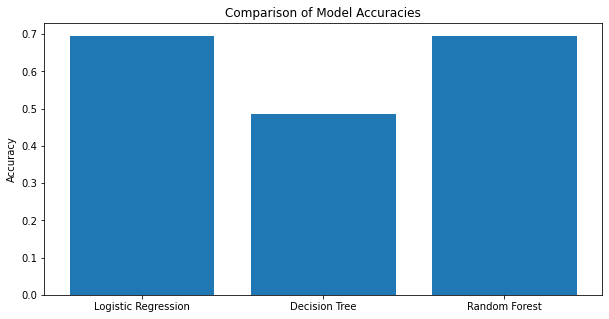

Logistic Regression prediction for the first sample: ['None']
Decision Tree prediction for the first sample: ['None']
Random Forest prediction for the first sample: ['None']


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('Health_Data_50k_English.csv')

# Removing columns not used in the model
df.drop(['Full Name'], axis=1, inplace=True)

# Data preparation
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Alcohol Consumption', 'Physical Activity', 'Diet', 'Obesity']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting the data into training and testing sets
X = df.drop('Diagnosed Disease', axis=1)
y = df['Diagnosed Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy}')
    print(f'Confusion Matrix for {name}:\n', confusion_matrix(y_test, predictions))
    print(f'Classification Report for {name}:\n', classification_report(y_test, predictions, zero_division=0))

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Making a prediction sample
sample = X_test[0].reshape(1, -1)  # Reshape for a single sample
for name, model in models.items():
    prediction = model.predict(sample)
    print(f'{name} prediction for the first sample: {prediction}')


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Health_Data_50k_English.csv')

# Modify the age by adding random noise within +/- 5 years
np.random.seed(42)
data['Age'] += np.random.randint(-5, 6, size=data.shape[0])

# Modify Smoking Years by adding/subtracting within a range
data['Smoking Years'] += np.random.randint(-3, 4, size=data.shape[0])
data['Smoking Years'] = data['Smoking Years'].clip(lower=0)

# Randomly assign new values to 'Physical Activity' and 'Diet'
activities = data['Physical Activity'].unique()
diets = data['Diet'].unique()
data['Physical Activity'] = np.random.choice(activities, size=data.shape[0])
data['Diet'] = np.random.choice(diets, size=data.shape[0])

# Simulate disease diagnosis based on lifestyle factors
conditions = ['None', 'Diabetes', 'Cardiovascular Disease', 'Hypertension', 'Lung Cancer']
probabilities = [0.7, 0.1, 0.1, 0.1]  # Adjust probabilities as necessary
data['Diagnosed Disease'] = np.random.choice(conditions, size=data.shape[0], p=probabilities)

# Save the modified dataset
data.to_csv('Modified_Health_Data_50k_English.csv', index=False)

print("Dataset has been modified and saved as 'Modified_Health_Data_50k_English.csv'.")


Dataset has been modified and saved as 'Modified_Health_Data_50k_English.csv'.
